In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.2 MB/s eta 0:00:00


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b6b581fc695cf1e9c4d584c7a23ad7a384a1e3f77f454b169457034d8fd62a99
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import os

print('Downloading dataset...')

# 数据集的下载链接
url = 'https://drive.google.com/u/0/uc?id=1gxMkS34HiW155keuYIDbq1c5CjY4awBo&export=download'
# 如本地没有，则下载数据集 
if not os.path.exists('./sentiment140.zip'):
    wget.download(url, './sentiment140.zip')
    print('Downloaded.')
else:
  print('Already exists.')

In [ ]:
if not os.path.exists('./sentiment140/'):
    !unzip sentiment140.zip

Archive:  sentiment140.zip
   creating: sentiment140/
  inflating: __MACOSX/._sentiment140  
  inflating: sentiment140/sentiment140_train_data.csv  
  inflating: __MACOSX/sentiment140/._sentiment140_train_data.csv  
  inflating: sentiment140/sentiment140_test_data.csv  
  inflating: __MACOSX/sentiment140/._sentiment140_test_data.csv  


In [ ]:
import pandas as pd

# 加载数据集到 pandas 的 dataframe 中
df = pd.read_csv("./sentiment140/sentiment140_train_data.csv", delimiter=',')

# 打印数据集的记录数
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# 抽样10条数据来预览一下
df.sample(10)

Number of training sentences: 80,000



,label,ids,date,flag,user,text
69025,4,1988988197,Sun May 31 23:59:35 PDT 2009,NO_QUERY,gentlerabbit,Putting winter clothes in storage and taking o...
36057,0,1687971293,Sun May 03 10:02:07 PDT 2009,NO_QUERY,AuntSay,Passing the Auburn exit wish I had more time
72657,4,1985455974,Sun May 31 17:08:13 PDT 2009,NO_QUERY,misskris293,amazinggg. i loveddd the taylor swift special....
33911,0,1995822848,Mon Jun 01 14:06:05 PDT 2009,NO_QUERY,ashleyhousee,tanning then out for the night. I miss my boo
40421,0,2192816962,Tue Jun 16 07:35:31 PDT 2009,NO_QUERY,pbiggs,@katebevan Quite - I'm a &quot;senior&quot; ne...
500,0,2186591413,Mon Jun 15 19:03:24 PDT 2009,NO_QUERY,alenamore,@r2sweet_tooth I miss you!
43752,0,2225190634,Thu Jun 18 10:25:21 PDT 2009,NO_QUERY,hesitated_lies,I have a hair appt at 3. sister is still slee...
78518,0,2016735581,Wed Jun 03 07:16:31 PDT 2009,NO_QUERY,Spookaap,@superrrabbit Same problem here. Tried it 1st ...
37404,4,1834832363,Mon May 18 04:20:45 PDT 2009,NO_QUERY,SingYou2Me,@RealHughJackman You've got your priorities st...
3050,4,1979382180,Sun May 31 02:48:22 PDT 2009,NO_QUERY,Jessimouche,@tokaino well did you try? haha


In [ ]:
# 构建 sentences 和 labels 列表
sentences = df.text.values
labels = df.label.values

In [ ]:
new_labels = []

for label in labels:
  if label == 4:
    new_labels.append(1)
  elif label == 0:
    new_labels.append(0)

# 将原来的标签0，4转换成0，1
new_labels

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,


In [ ]:
from transformers import BertTokenizer

# 加载 BERT 分词器
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# 输出原始句子
print(' Original: ', sentences[0])

# 将分词后的内容输出
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# 将每个词映射到词典下标
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


 Original:  @nicholasmw 1 day u will find that girl worry 
Tokenized:  ['@', 'nicholas', '##m', '##w', '1', 'day', 'u', 'will', 'find', 'that', 'girl', 'worry']
Token IDs:  [1030, 6141, 2213, 2860, 1015, 2154, 1057, 2097, 2424, 2008, 2611, 4737]


In [ ]:
max_len = 0
for sent in sentences:

    # 将文本分词，并添加 `[CLS]` 和 `[SEP]` 符号
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  163


In [ ]:
# 将数据集分完词后存储到列表中
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # 输入文本
                        add_special_tokens = True, # 添加 '[CLS]' 和 '[SEP]'
                        max_length = 170,           # 填充 & 截断长度
                        pad_to_max_length = True,
                        return_attention_mask = True,   # 返回 attn. masks.
                        return_tensors = 'pt',     # 返回 pytorch tensors 格式的数据
                   )
    
    # 将编码后的文本加入到列表  
    input_ids.append(encoded_dict['input_ids'])
    
    # 将文本的 attention mask 也加入到 attention_masks 列表
    attention_masks.append(encoded_dict['attention_mask'])

# 将列表转换为 tensor
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(new_labels)

# 输出第 1 行文本的原始和编码后的信息
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  @nicholasmw 1 day u will find that girl worry 
Token IDs: tensor([ 101, 1030, 6141, 2213, 2860, 1015, 2154, 1057, 2097, 2424, 2008, 2611,
        4737,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  

In [ ]:
labels = torch.tensor(new_labels)
labels

tensor([1, 0, 0,  ..., 0, 0, 0])

In [ ]:
from torch.utils.data import TensorDataset, random_split

# 将输入数据合并为 TensorDataset 对象
dataset = TensorDataset(input_ids, attention_masks, labels)

# 计算训练集和验证集大小
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# 按照数据大小随机拆分训练集和测试集
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))


72,000 training samples
8,000 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# 在 fine-tune 的训练中，BERT 作者建议小批量大小设为 16 或 32
batch_size = 32

# 为训练和验证集创建 Dataloader，对训练样本随机洗牌
train_dataloader = DataLoader(
            train_dataset,  # 训练样本
            sampler = RandomSampler(train_dataset), # 随机小批量
            batch_size = batch_size # 以小批量进行训练
        )

# 验证集不需要随机化，这里顺序读取就好
validation_dataloader = DataLoader(
            val_dataset, # 验证样本
            sampler = SequentialSampler(val_dataset), # 顺序选取小批量
            batch_size = batch_size 
        )


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# 加载 BertForSequenceClassification, 预训练 BERT 模型 + 顶层的线性分类层 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # 小写的 12 层预训练模型
    num_labels = 2, # 分类数 --2 表示二分类
                    # 你可以改变这个数字，用于多分类任务  
    output_attentions = False, # 模型是否返回 attentions weights.
    output_hidden_states = False, # 模型是否返回所有隐层状态.
)

# 在 gpu 中运行该模型
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8
                )

from transformers import get_linear_schedule_with_warmup

# 训练 epochs。 BERT 作者建议在 2 和 4 之间，设大了容易过拟合 
epochs = 4

# 总的训练样本数
total_steps = len(train_dataloader) * epochs

# 创建学习率调度器
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np

# 根据预测结果和标签数据来计算准确率
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # 四舍五入到最近的秒
    elapsed_rounded = int(round((elapsed)))
    
    # 格式化为 hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

torch.cuda.empty_cache()

# 以下训练代码是基于 `run_glue.py` 脚本:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# 设定随机种子值，以确保输出是确定的
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 存储训练和评估的 loss、准确率、训练时长等统计指标, 
training_stats = []

# 统计整个训练时长
total_t0 = time.time()

for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 统计单次 epoch 的训练时间
    t0 = time.time()

    # 重置每次 epoch 的训练总 loss
    total_train_loss = 0

    # 将模型设置为训练模式。这里并不是调用训练接口的意思
    # dropout、batchnorm 层在训练和测试模式下的表现是不同的 (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # 训练集小批量迭代
    for step, batch in enumerate(train_dataloader):

        # 每经过40次迭代，就输出进度信息
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 准备输入数据，并将其拷贝到 gpu 中
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # 每次计算梯度前，都需要将梯度清 0，因为 pytorch 的梯度是累加的
        model.zero_grad()        

        # 前向传播
        # 文档参见: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # 该函数会根据不同的参数，会返回不同的值。 本例中, 会返回 loss 和 logits -- 模型的预测结果
        # loss, logits = model(b_input_ids, 
        #                      token_type_ids=None, 
        #                      attention_mask=b_input_mask, 
        #                      labels=b_labels)

        out = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask, 
                     labels=b_labels)
        loss = out.loss
        logits = out.logits

        # 累加 loss
        total_train_loss += loss.item()

        # 反向传播
        loss.backward()

        # 梯度裁剪，避免出现梯度爆炸情况
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 更新参数
        optimizer.step()

        # 更新学习率
        scheduler.step()

    # 平均训练误差
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # 单次 epoch 的训练时长
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # 完成一次 epoch 训练后，就对该模型的性能进行验证

    print("")
    print("Running Validation...")

    t0 = time.time()

    # 设置模型为评估模式
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # 将输入数据加载到 gpu 中
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # 评估的时候不需要更新参数、计算梯度
        with torch.no_grad():        
            # (loss, logits) = model(b_input_ids, 
            #                        token_type_ids=None, 
            #                        attention_mask=b_input_mask,
            #                        labels=b_labels)
            out = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask, 
                     labels=b_labels)
            loss = out.loss
            logits = out.logits

            
        # 累加 loss
        total_eval_loss += loss.item()

        # 将预测结果和 labels 加载到 cpu 中计算
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # 计算准确率
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # 打印本次 epoch 的准确率
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # 统计本次 epoch 的 loss
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # 统计本次评估的时长
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # 记录本次 epoch 的所有统计信息
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  2,250.    Elapsed: 0:00:13.
  Batch    80  of  2,250.    Elapsed: 0:00:22.
  Batch   120  of  2,250.    Elapsed: 0:00:30.
  Batch   160  of  2,250.    Elapsed: 0:00:39.
  Batch   200  of  2,250.    Elapsed: 0:00:48.
  Batch   240  of  2,250.    Elapsed: 0:00:57.
  Batch   280  of  2,250.    Elapsed: 0:01:06.
  Batch   320  of  2,250.    Elapsed: 0:01:15.
  Batch   360  of  2,250.    Elapsed: 0:01:24.
  Batch   400  of  2,250.    Elapsed: 0:01:33.
  Batch   440  of  2,250.    Elapsed: 0:01:42.
  Batch   480  of  2,250.    Elapsed: 0:01:50.
  Batch   520  of  2,250.    Elapsed: 0:01:59.
  Batch   560  of  2,250.    Elapsed: 0:02:08.
  Batch   600  of  2,250.    Elapsed: 0:02:17.
  Batch   640  of  2,250.    Elapsed: 0:02:26.
  Batch   680  of  2,250.    Elapsed: 0:02:35.
  Batch   720  of  2,250.    Elapsed: 0:02:44.
  Batch   760  of  2,250.    Elapsed: 0:02:53.
  Batch   800  of  2,250.    Elapsed: 0:03:02.
  Batch   840  of

In [ ]:
import pandas as pd

# 保留 2 位小数
pd.set_option('display.max_colwidth', 10)

# 加载训练统计到 DataFrame 中
df_stats = pd.DataFrame(data=training_stats)

# 使用 epoch 值作为每行的索引
df_stats = df_stats.set_index('epoch')

# 展示表格数据
df_stats


,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.399238,0.360037,0.84400,0:08:25,0:00:17
2,0.283603,0.363111,0.85075,0:08:20,0:00:17
3,0.187295,0.447440,0.84700,0:08:21,0:00:17
4,0.123779,0.534344,0.84825,0:08:22,0:00:17


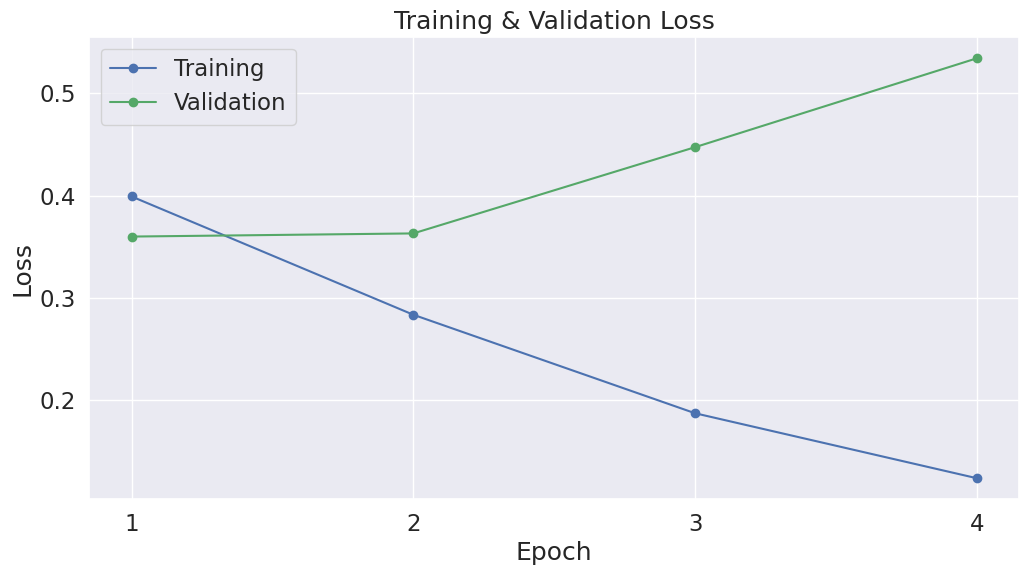

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

# 绘图风格设置
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# 绘制学习曲线
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import pandas as pd

# 加载数据集
df = pd.read_csv("./sentiment140/sentiment140_train_data.csv", delimiter=',')
# 打印数据集大小
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
# 将数据集转换为列表
sentences = df.text.values
labels = df.label.values
new_labels = []

for label in labels:
  if label == 4:
    new_labels.append(1)
  elif label == 0:
    new_labels.append(0)


# 分词、填充或截断
input_ids = []
attention_masks = []
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(new_labels)

batch_size = 32  

# 准备好数据集
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)


Number of test sentences: 80,000



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# 预测测试集

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))
# 依然是评估模式
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# 预测
for batch in prediction_dataloader:
  # 将数据加载到 gpu 中
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch
  
  # 不需要计算梯度
  with torch.no_grad():
      # 前向传播，获取预测结果
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # 将结果加载到 cpu 中
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # 存储预测结果和 labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 80,000 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))


Positive samples: 159624 of 80000 (199.53%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# 计算每个 batch 的 MCC
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # 计算该 batch 的 MCC  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

# 创建柱状图来显示每个 batch 的 MCC 分数
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

Calculating Matthews Corr. Coef. for each batch...


NameError: ignored

In [ ]:
# 合并所有 batch 的预测结果
flat_predictions = np.concatenate(predictions, axis=0)

# 取每个样本的最大值作为预测值
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# 合并所有的 labels
flat_true_labels = np.concatenate(true_labels, axis=0)

# 计算 MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.936


In [ ]:
import os

# 模型存储到的路径
output_dir = './model_save/'

# 目录不存在则创建
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# 使用 `save_pretrained()` 来保存已训练的模型，模型配置和分词器
# 它们后续可以通过 `from_pretrained()` 加载
model_to_save = model.module if hasattr(model, 'module') else model  # 考虑到分布式/并行（distributed/parallel）训练
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [ ]:
# 挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 拷贝模型文件到 Google Drive

output_dir = './drive/MyDrive/Bert_Finetune/'

# 目录不存在则创建
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
!cp -r ./model_save/ ./drive/MyDrive/Bert_Finetune/